# Attention !!!
- Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.
- Only TODO 1, 2, 3, 4, 5, 6, 10, 11 will be graded.
- **Extra credit:** 1% of total grade for Com Eng Math 2 for TODO 7, 8, 9 (1/3 each.)

# Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.

TODO#1: Write functions that samples from the following distribution
1. $\mathcal{N}(0,1)$
2. $Bernoulli(0.3)$
3. $B(10, 0.3)$
4. $Multinomial(n=10, p=[0.3,0.2,0.5])$
5. $U(0,1)$
<!-- 6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(b, K):\frac{(b-a)K}{2}=1$. -->
6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(\frac{a+b}{2}, K):\frac{(b-a)K}{2}=1$.

Capture screenshot of the histogram for each of the distribution and paste them on the pdf file. The example is shown below.

Hint: see scipy.stats for common distributions.
[plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) should be helpful for plotting histograms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom, multinomial, uniform, expon, triang

In [10]:
def sample_normal(sample_size=10, mu=0, std=1):
  samples = norm.rvs(loc=mu, scale=std, size=sample_size)
  return samples


def sample_bernoulli(sample_size=10, p=0.5):
  samples = bernoulli.rvs(p, size=sample_size)
  return samples


def sample_binomial(sample_size=10, n=10, p=0.5):
  samples = binom.rvs(n, p, size=sample_size)
  return samples


def sample_multinomial(sample_size=10, n=100, p=[0.3, 0.2, 0.5]):
  samples = multinomial.rvs(n, p, size=sample_size)
  return samples


def sample_uniform(sample_size=10, from_x=0, to_x=1):
  samples = uniform.rvs(loc=from_x, scale=to_x - from_x, size=sample_size)
  return samples


def sample_triangle(sample_size=10, a=0, b=1):
  samples = triang.rvs(c=0.5, loc=a, scale=b - a, size=sample_size)
  return samples

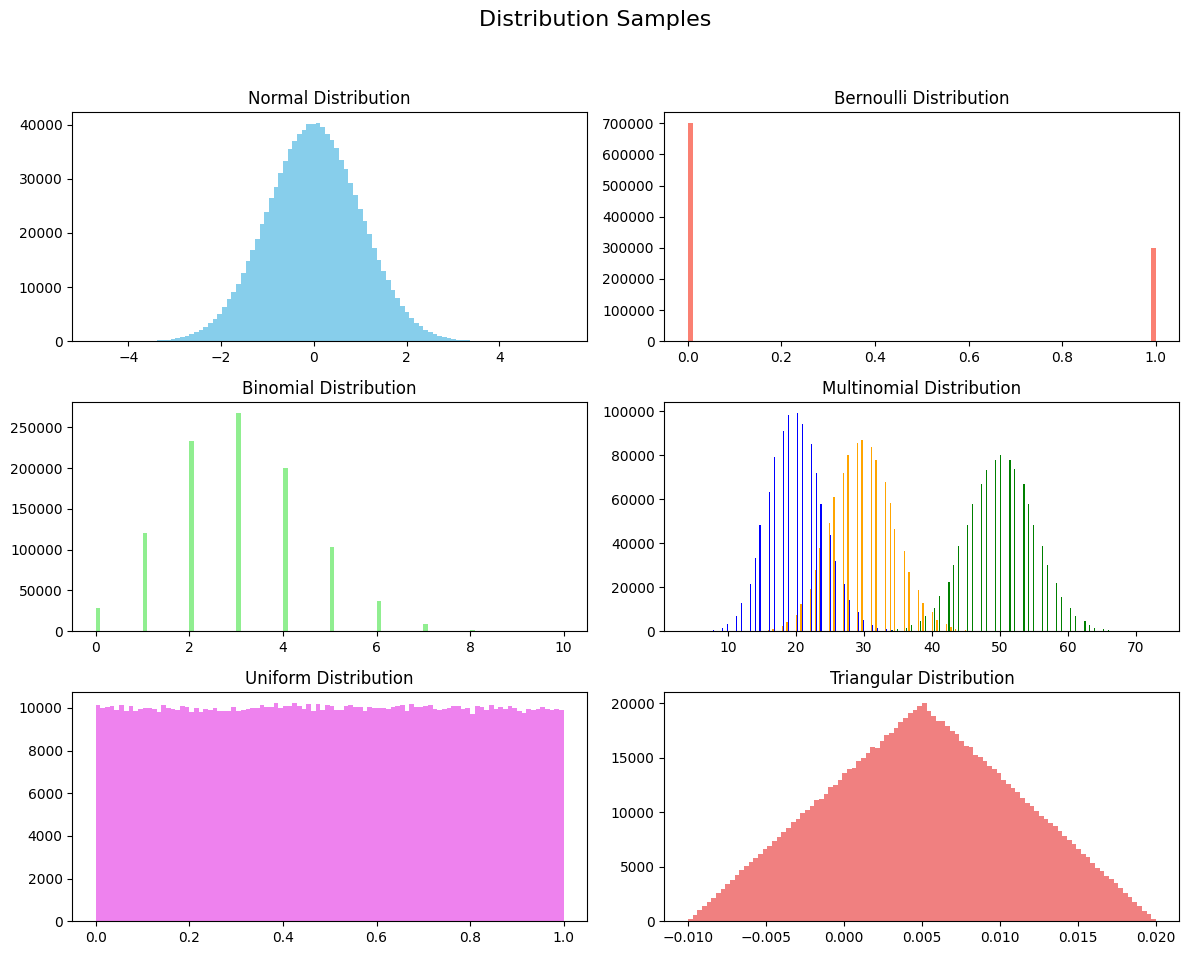

In [15]:
sample_size = 1000000
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Distribution Samples", fontsize=16)

axes[0, 0].hist(sample_normal(sample_size, mu=0, std=1), bins=100, color='skyblue')
axes[0, 0].set_title("Normal Distribution")

axes[0, 1].hist(sample_bernoulli(sample_size, p=0.3), bins=100, color='salmon')
axes[0, 1].set_title("Bernoulli Distribution")

axes[1, 0].hist(sample_binomial(sample_size, n=10, p=0.3), bins=100, color='lightgreen')
axes[1, 0].set_title("Binomial Distribution")

axes[1, 1].hist(sample_multinomial(sample_size, n=100, p=[0.3, 0.2, 0.5]), bins=100, color=['orange', 'blue', 'green'])
axes[1, 1].set_title("Multinomial Distribution")

axes[2, 0].hist(sample_uniform(sample_size, from_x=0, to_x=1), bins=100, color='violet')
axes[2, 0].set_title("Uniform Distribution")

axes[2, 1].hist(sample_triangle(sample_size, -0.01, 0.02), bins=100, color='lightcoral')
axes[2, 1].set_title("Triangular Distribution")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

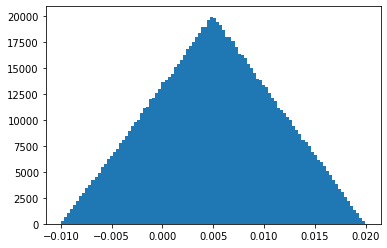

In [ ]:
# Use this code block to show your sampling result.
sample_size = 1000000
s = sample_triangle(sample_size, -0.01, 0.02)
count, bins, ignored = plt.hist(s, 100, density=False)
plt.show()

# Law of large number

### Law of large number

**TODO#2:** Using a sampling function from TODO#1.1, Plot the graph that shows the relation between an empirical mean and sampling size from 1 up to 10000.
What does the graph imply about the difference between the empirical mean and the theoritical mean?

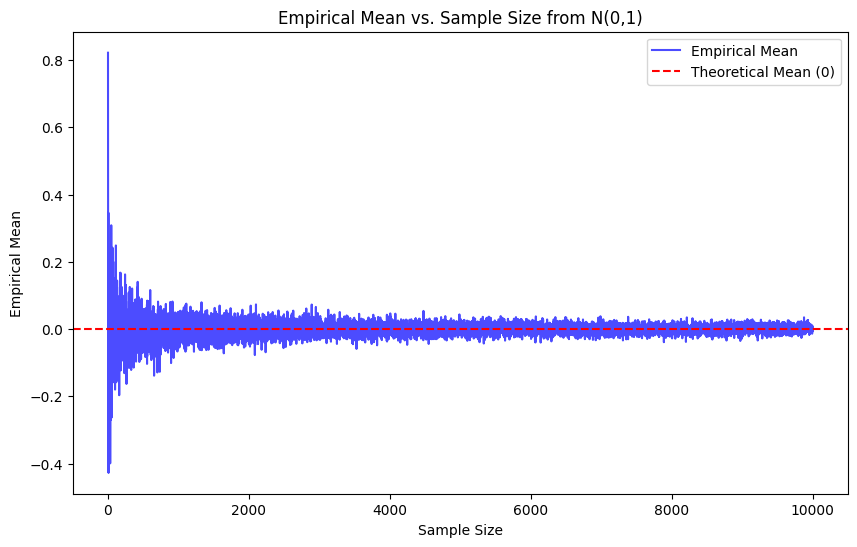

In [ ]:
sample_sizes = np.arange(1, 10001)

empirical_means = []

# Generate samples from N(0,1) and calculate the mean for each sample size
for n in sample_sizes:
    samples = norm.rvs(loc=0, scale=1, size=n)
    empirical_mean = np.mean(samples)
    empirical_means.append(empirical_mean)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, empirical_means, label="Empirical Mean", color="blue", alpha=0.7)
plt.axhline(0, color="red", linestyle="--", label="Theoretical Mean (0)")

plt.xlabel("Sample Size")
plt.ylabel("Empirical Mean")
plt.title("Empirical Mean vs. Sample Size from N(0,1)")
plt.legend()
plt.show()

### Law of large number for histogram

The histogram is used to approximate the PDF of an unknown distribution.
The bin in the histogram represents the frequency of the event happening inside the bin range.

**TODO#3:** Given a fix bin number of 40. Plot the histogram of the data sampling from the function, `sample_normal(n, 0, 1)`, for different sizes of sample: 500, 1k, 5k and 10k.
Compare and explain the relation between the approximation given by the histogram and the true PDF for each of the sample size.

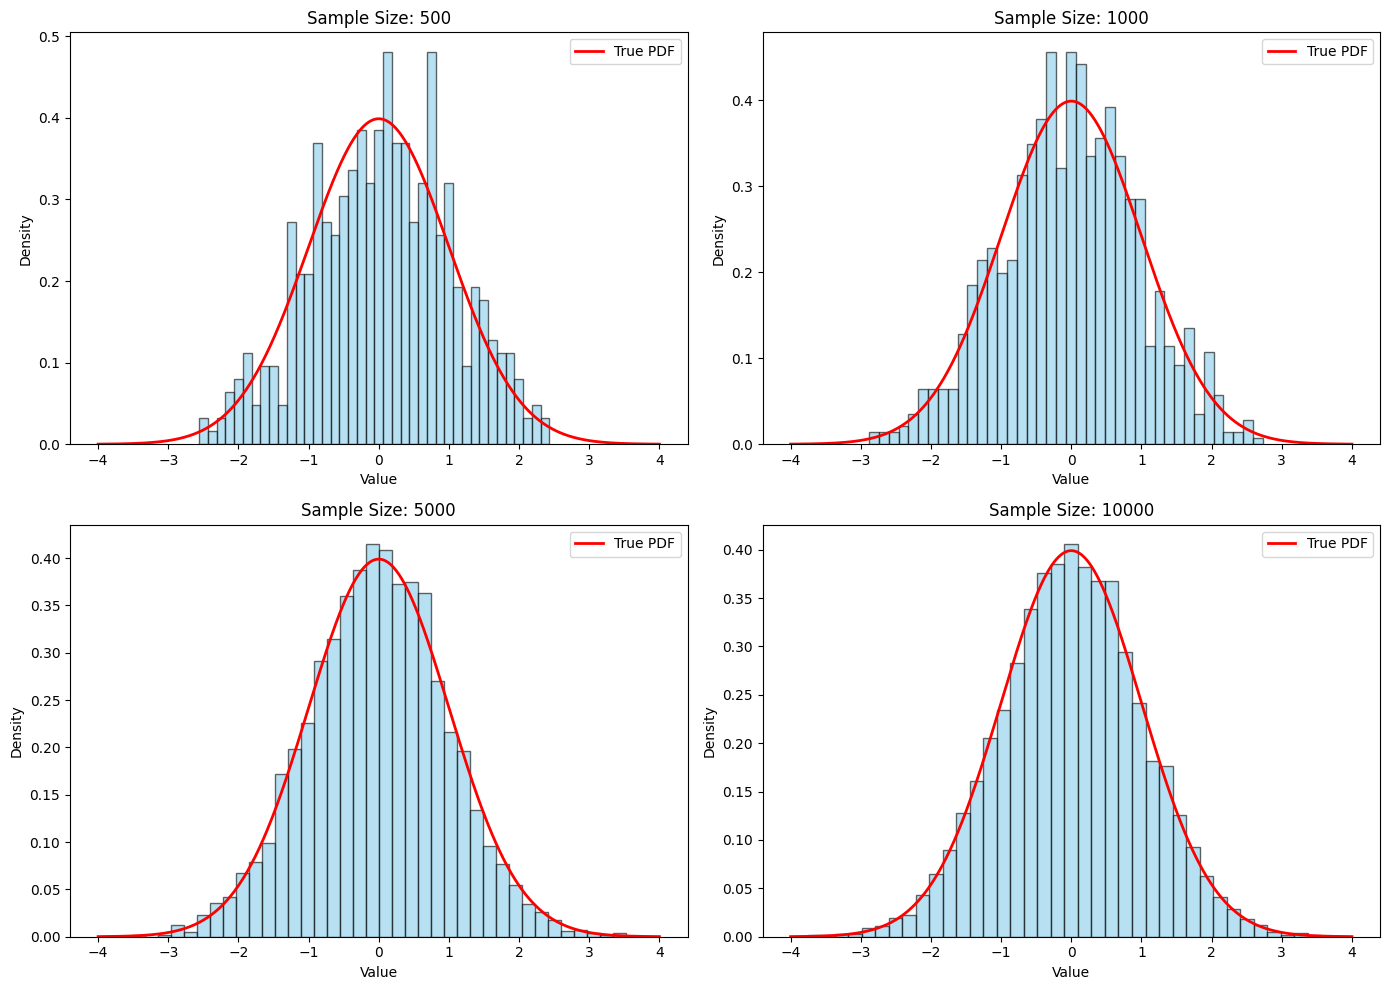

In [ ]:
sample_sizes = [500, 1000, 5000, 10000]

plt.figure(figsize=(14, 10))

# Plot histograms for each sample size
for i, n in enumerate(sample_sizes, 1):
    samples = sample_normal(n, 0, 1)
    
    plt.subplot(2, 2, i)
    plt.hist(samples, bins=40, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    
    # Plot the true PDF for comparison
    x = np.linspace(-4, 4, 1000)
    pdf = norm.pdf(x, 0, 1)
    plt.plot(x, pdf, color='red', linewidth=2, label='True PDF')
    
    plt.title(f"Sample Size: {n}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

## Central limit theorem

In this part we will use the Central Limit Theorem to approximate the true probabity of getting more than 40 heads when an unfair coin, with the probability 0.3 of being head, is tossed 100 times.


**TODO#4:** Simulate multiple coin tosses to construct a histrogram from the outcomes. Plot the histogram. Hint: x-axis should represents the number of heads when the coin is tossed 100 times. Does this histogram looks like a normal distribution?

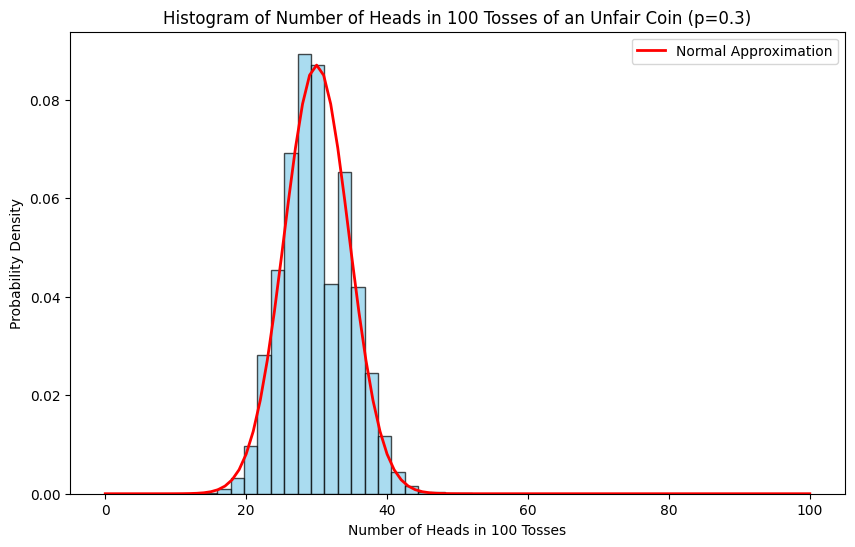

In [18]:
p = 0.3       # Probability of getting a head
n_tosses = 100  # Number of tosses per trial
n_simulations = 10000  # Number of trials (simulations)

# Simulate multiple trials of 100 coin tosses
heads_counts = binom.rvs(n=n_tosses, p=p, size=n_simulations)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(heads_counts, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Plot the normal distribution approximation using CLT
mean = n_tosses * p
std_dev = np.sqrt(n_tosses * p * (1 - p))
x = np.arange(0, n_tosses + 1)
plt.plot(x, (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2),
         color="red", lw=2, label="Normal Approximation")

# Labels and title
plt.xlabel("Number of Heads in 100 Tosses")
plt.ylabel("Probability Density")
plt.title("Histogram of Number of Heads in 100 Tosses of an Unfair Coin (p=0.3)")
plt.legend()
plt.show()

**TODO#5:** Use CLT to find the probability of getting more than 40 heads.

**TODO#6:** Compare and find the difference between CLT's approximation and the actual probability using the binomial distribution.

In [20]:
n = 100
p = 0.3
k = 40

# TODO#5
mean = n * p
std_dev = (n * p * (1 - p))**0.5
z_score = (k - mean) / std_dev
clt_prob = 1 - norm.cdf(z_score)

# TODO#6
exact_prob = 1 - binom.cdf(k, n, p)

print(f"CLT approximation: {clt_prob:.5f}")
print(f"Actual probability using binomial distribution: {exact_prob:.5f}")
print(f"Difference between CLT and actual probability: {abs(clt_prob - exact_prob):.5f}")

CLT approximation: 0.01455
Actual probability using binomial distribution: 0.01250
Difference between CLT and actual probability: 0.00205


# Algebra of Random Variables

Given an independent random variable $X$ and $Y$, such that $X \sim F$ and $Y \sim U(3,5)$. The summation of those two is written as $Z = X + Y$ and the PDF of $F$ is defined below.
$$
F(X) =
\begin{cases}
0.1, & -2<=X<=0\\
0.4, & 0<X<=2 \\
\end{cases}
$$
**TODO#7:** Find $P( 3 < Z < 5 )$.

# Correlation

The correlation captures the linear relationshi between two sets of random variables. The higher magnitude of the correlation indicates a stronger relationship.


**TODO#8:** Find the correlation of $X$ and $Y = X + A$, given that $X \sim U(-1,1)$ and
1. $A = 10$
2. $A \sim U(-1,1)$
3. $A \sim U(-10,10)$
4. $A \sim U(-100,100)$


**TODO#9:** From the results in TODO#8, answer following questions
1. Does the correlation decrease as we increase the randomness of A ?
2. Explain the result when we change from $A \sim U(-10,10)$ to $A \sim U(9090,10010)$. Hint: Compare the result with $A$ and $A + 10000: A \sim U(-10,10) $

In [33]:
num_samples = 10000

X = np.random.uniform(-1, 1, num_samples)

def calculate_correlation(X, A):
    Y = X + A
    correlation = np.corrcoef(X, Y)[0, 1]
    return correlation

# Case 1: A = 10 (constant)
A_const = 10
Y_const = X + A_const
correlation_const = calculate_correlation(X, A_const)
print(f"Correlation with A = 10: {correlation_const}")

# Case 2: A ~ U(-1, 1)
A_uniform1 = np.random.uniform(-1, 1, num_samples)
correlation_uniform1 = calculate_correlation(X, A_uniform1)
print(f"Correlation with A ~ U(-1, 1): {correlation_uniform1}")

# Case 3: A ~ U(-10, 10)
A_uniform10 = np.random.uniform(-10, 10, num_samples)
correlation_uniform10 = calculate_correlation(X, A_uniform10)
print(f"Correlation with A ~ U(-10, 10): {correlation_uniform10}")

# Case 4: A ~ U(-100, 100)
A_uniform100 = np.random.uniform(-100, 100, num_samples)
correlation_uniform100 = calculate_correlation(X, A_uniform100)
print(f"Correlation with A ~ U(-100, 100): {correlation_uniform100}")

# Extra Case: A ~ U(9090, 10010)
A_large_shifted = np.random.uniform(9090, 10010, num_samples)
correlation_large_shifted = calculate_correlation(X, A_large_shifted)
print(f"Correlation with A ~ U(9090, 10010): {correlation_large_shifted}")


Correlation with A = 10: 1.0
Correlation with A ~ U(-1, 1): 0.7035594716206911
Correlation with A ~ U(-10, 10): 0.11422760814225007
Correlation with A ~ U(-100, 100): 0.006093155798470251
Correlation with A ~ U(9090, 10010): -0.008354773508270727


# Hamtaro and his cloud storage empire.



After the success in the manufacturing business. Hamtaro wants to expand his business into a new sector.
Since cloud computing is currently booming, he decides to enter into the cloud storage business.

The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
<!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

**TODO#10:** Answer the following questions.
1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.
2. What is the probability of failure at the temperature used in part 1?
<!-- 3. If Hamtaro want to handle 10k concurrent requests, what is the minimum disks should Hamtoro has to make 99.99% of disk availability and how should he split the workloads? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to be read at the same time. -->
3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

**Hint:** `scipy.integrate.quad` can help you do integration.

In [26]:
sample_size = 1000000

min_disk = 1
while True:
    prob = (1.1437*(10**(-3)))**min_disk
    res = binom.rvs(n=10000, p=prob, size=sample_size)

    fail_count = 0
    for x in res:
        if x > 1:
            fail_count += 1
    
    prob_fail = fail_count / len(res)
    print(f"fail_count: {fail_count}")
    print(f"Disk size: {min_disk}, Probability of failure: {prob_fail}")
    if prob_fail < 0.01/100:
        break
    min_disk += 1

print(f"Minimum disk size: {min_disk}")

fail_count: 999872
Disk size: 1, Probability of failure: 0.999872
fail_count: 89
Disk size: 2, Probability of failure: 8.9e-05
Minimum disk size: 2


# Moontaro
![picture](https://i.redd.it/mcveltqx2j071.png)

Recently, cryptocurrency investment has become extremely popular due to its extraordinarily high rates of return. Though many people consider it a risky investment, Hamtaro does not want to miss this opportunity and start gathering information about these coins. His research suggests that four coins, namely $a$, $b$, $c$, and $d$, have a promising future to go to the moon.


Hamtaro wants to run simulations to validate his chances. As the value of the coins is non-deterministic, he models it sequentially based on their historical values (a.k.a. autoregressive model). The price of coin $i$ at day $t$ is formulated as

$p_{i,t} = p_{i,t-1} \times r_{i,t}$, where $i \in \{a, b, c, d\}$, and  $p_{i, 0} = 10$.

The rates $r_{i,t}$, are drawn from a multivariant guassian distribution $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, where $\mu = [1.003, 1.002, 1.004, 1.004]^T$ and $\mathbf{\Sigma}$ as given below:

$\mathbf{\Sigma}$ | a | b | c | d
--- | --- | --- | --- |---
a |  10 x 10$^{-3}$ | 0 | 4 x 10$^{-3}$ | 5 x 10$^{-3}$
b |  0  | 3 x 10$^{-3}$ | 0 | 0
c |  4 x 10$^{-3}$  | 0 | 12 x 10$^{-3}$| 2 x 10$^{-3}$
d |  5 x 10$^{-3}$  | 0 | 2 x 10$^{-3}$ | 15 x 10$^{-3}$


<!-- 1. Are $p_{a,t}$ and $p_{b,t}$ independent ? Why ?
2. Are $p_{a,t}$ and $p_{c,t}$ independent ? Why ?
3. Are $p_{a,t}$ and $p_{d,t}$ independent ? Why ? -->

**TODO11:**
1. Which pairs of coins are independent? Why?
2. Given the following definitions:
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$.
  hint: you should write reusable functions to make your life easier.
3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.
4. How can the expected return be positive while having around 50\% chance of profitability?

In [31]:
mu = np.array([1.003, 1.002, 1.004, 1.004])
sigma = np.array([
    [10e-3, 0, 4e-3, 5e-3],
    [0, 3e-3, 0, 0],
    [4e-3, 0, 12e-3, 2e-3],
    [5e-3, 0, 2e-3, 15e-3]
])
initial_price = 10
no_simulations = 10000

def simulate_return(days, mu, sigma, initial_price):
    returns = []
    for _ in range(no_simulations):
        rates = np.random.multivariate_normal(mu, sigma, days)
        prices = np.cumprod(rates, axis=0) * initial_price
        returns.append(prices[-1] - initial_price)
    return np.mean(returns), np.var(returns), returns

# T=30 and T=180 days
for T in [30, 180]:
    print(f"Expected returns and variance for T={T} days:")
    for i, coin in enumerate(['a', 'b', 'c', 'd']):
        expected_return, variance, simulated_returns = simulate_return(T, mu, sigma, initial_price)
        print(f"Coin {coin}: Expected Return = {expected_return:.2f}, Variance = {variance:.4f}")


Expected returns and variance for T=30 days:
Coin a: Expected Return = 0.99, Variance = 43.3070
Coin b: Expected Return = 0.96, Variance = 42.7298
Coin c: Expected Return = 1.03, Variance = 44.7941
Coin d: Expected Return = 1.02, Variance = 44.6286
Expected returns and variance for T=180 days:
Coin a: Expected Return = 7.78, Variance = 1971.4883
Coin b: Expected Return = 7.94, Variance = 2022.9125
Coin c: Expected Return = 8.35, Variance = 2177.9045
Coin d: Expected Return = 7.78, Variance = 1812.5403


After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  |
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).
6. Which strategy yields the highest return?
7. Which strategy is the safest one?
8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).
9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

In [32]:
mu = np.array([1.003, 1.002, 1.004, 1.004])
sigma = np.array([
    [10e-3, 0, 4e-3, 5e-3],
    [0, 3e-3, 0, 0],
    [4e-3, 0, 12e-3, 2e-3],
    [5e-3, 0, 2e-3, 15e-3]
])
initial_price = 10
no_simulations = 10000
time_horizons = [30, 180]

strategies = [
    np.array([1, 0, 0, 0]),
    np.array([0, 1, 0, 0]),
    np.array([0, 0, 1, 0]),
    np.array([0, 0, 0, 1]),
    np.array([0.5, 0.5, 0, 0]),
    np.array([0.5, 0, 0.5, 0]),
    np.array([0.5, 0, 0, 0.5])
]

def simulate_strategy(strategy, days):
    returns = []
    for _ in range(no_simulations):
        rates = np.random.multivariate_normal(mu, sigma, days)
        portfolio_price = initial_price * np.prod(rates @ strategy) # matrix multiplication
        returns.append(portfolio_price - initial_price)
    return np.mean(returns), np.var(returns), np.sum(np.array(returns) > 0) / no_simulations

results = {}
for T in time_horizons:
    print(f"Results for T={T} days:")
    for idx, strategy in enumerate(strategies, start=1):
        expected_return, variance, prob_profit = simulate_strategy(strategy, T)
        results[(T, idx)] = (expected_return, variance, prob_profit)
        print(f"Strategy {idx}: Expected Return = {expected_return:.2f}, Variance = {variance:.4f}, Probability of Profit = {prob_profit:.2%}")


Results for T=30 days:
Strategy 1: Expected Return = 0.95, Variance = 41.0681, Probability of Profit = 46.16%
Strategy 2: Expected Return = 0.69, Variance = 10.9064, Probability of Profit = 52.52%
Strategy 3: Expected Return = 1.17, Variance = 53.0204, Probability of Profit = 45.51%
Strategy 4: Expected Return = 1.30, Variance = 68.9645, Probability of Profit = 44.58%
Strategy 5: Expected Return = 0.75, Variance = 11.5987, Probability of Profit = 53.24%
Strategy 6: Expected Return = 1.07, Variance = 31.0128, Probability of Profit = 49.57%
Strategy 7: Expected Return = 1.12, Variance = 35.9985, Probability of Profit = 48.32%
Results for T=180 days:
Strategy 1: Expected Return = 7.52, Variance = 1553.5765, Probability of Profit = 39.77%
Strategy 2: Expected Return = 4.38, Variance = 150.4157, Probability of Profit = 55.33%
Strategy 3: Expected Return = 9.40, Variance = 1919.6530, Probability of Profit = 39.94%
Strategy 4: Expected Return = 11.58, Variance = 6973.8269, Probability of Prof